In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as cumfreq

vendasDiarias = {'Vendas por Dia': [12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]}

categorias = ['TVs', 'Laptops', 'Celulares', 'Tablets']
numVendas = [60, 80, 200, 50]
precoMedio = [2000, 3500, 1200, 1800]
dtPorCategoria = pd.DataFrame({
  'Categorias': categorias,
  'Número de Vendas': numVendas,
  'Preço Médio': precoMedio
})
display(dtPorCategoria)

dt = pd.DataFrame(vendasDiarias)
display(dt)

# vc = pd.DataFrame(vendasPorCategoria)
# display(vc)


,Categorias,Número de Vendas,Preço Médio
0,TVs,60,2000
1,Laptops,80,3500
2,Celulares,200,1200
3,Tablets,50,1800


,Vendas por Dia
0,12
1,15
2,14
3,10
4,12
5,16
6,18
7,17
8,14
9,19


In [2]:
n_classes = 5

n_max = dt['Vendas por Dia'].max()
n_min = dt['Vendas por Dia'].min()

amplitude = round((n_max-n_min)/n_classes)

classes = np.arange(n_min, n_max+2, amplitude)

tabela_frequencia = dt['Vendas por Dia'].value_counts(bins = n_classes).sort_index()
tabela_frequencia = tabela_frequencia.reset_index()
tabela_frequencia.columns = ['Classe', 'Frequência']

tabela_frequencia['Classe'] = tabela_frequencia["Frequência"].index
tabela_frequencia["Pontos Médios"] = (classes[:-1] + classes[1:]) / 2
tabela_frequencia['Frequência Relativa'] = tabela_frequencia['Frequência'].values/len(dt['Vendas por Dia'])
tabela_frequencia['Frenquência Acumulativa'] = tabela_frequencia['Frequência'].values.cumsum()

display(tabela_frequencia)

,Classe,Frequência,Pontos Médios,Frequência Relativa,Frenquência Acumulativa
0,0,4,10.5,0.133333,4
1,1,8,13.5,0.266667,12
2,2,7,16.5,0.233333,19
3,3,6,19.5,0.200000,25
4,4,5,22.5,0.166667,30


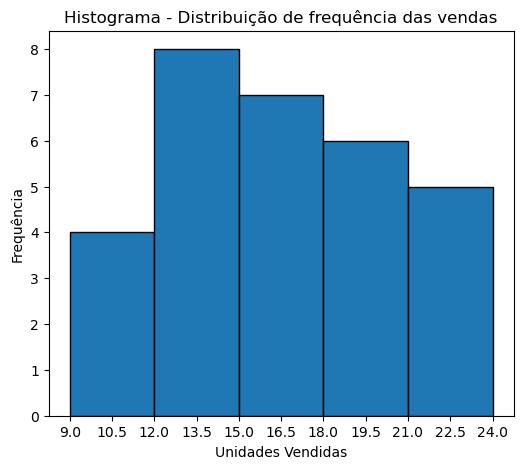

In [3]:
plt.figure(figsize=(6, 5))
plt.hist(x=tabela_frequencia['Pontos Médios'], bins=classes, weights=tabela_frequencia['Frequência'], edgecolor= 'black')
plt.title('Histograma - Distribuição de frequência das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

plt.xticks(np.concatenate([classes, tabela_frequencia['Pontos Médios']]))

plt.show()

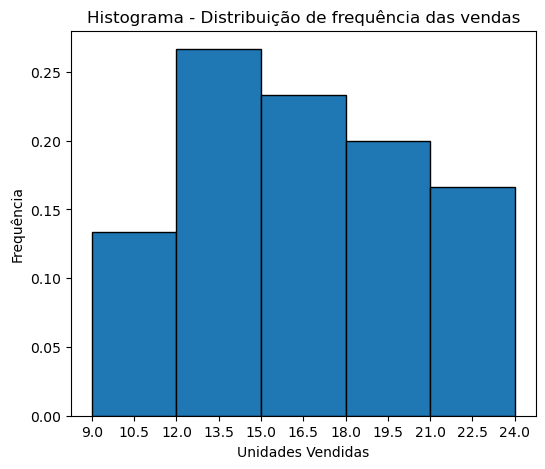

In [4]:
plt.figure(figsize=(6,5))
plt.hist(x=tabela_frequencia['Pontos Médios'], bins=classes, weights=tabela_frequencia['Frequência Relativa'], edgecolor='black')


plt.title('Histograma - Distribuição de frequência das vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

plt.xticks(np.concatenate([classes, tabela_frequencia['Pontos Médios']]))

plt.show()



Ponto médio fictício à esquerda: 7.5
Ponto médio fictício à direita: 25.5


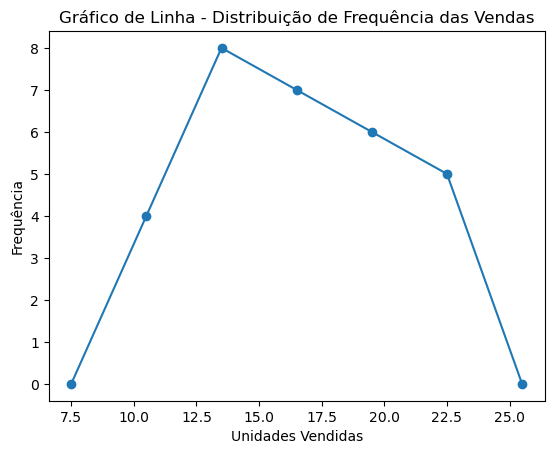

In [5]:
# Valor fictício à esquerda e à direita
fic_esq = [tabela_frequencia['Pontos Médios'].iloc[0] - amplitude]
print(f'Ponto médio fictício à esquerda: {fic_esq[0]}')
fic_dir = [tabela_frequencia['Pontos Médios'].iloc[-1] + amplitude]
print(f'Ponto médio fictício à direita: {fic_dir[0]}')

# Concatenar os valores de x (pontos médios) e y (frequências)
x_data = np.concatenate([fic_esq, tabela_frequencia['Pontos Médios'], fic_dir])
y_data = np.concatenate([[0], tabela_frequencia['Frequência'], [0]])

# Criar o gráfico de linha
plt.plot(x_data, y_data, marker='o')

# Título e rótulos dos eixos
plt.title('Gráfico de Linha - Distribuição de Frequência das Vendas')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()

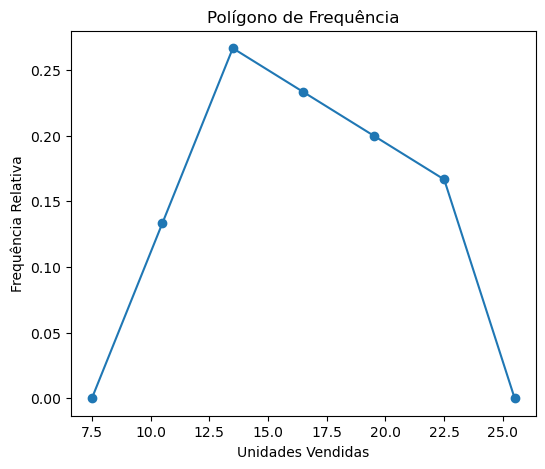

In [6]:
y_data = np.concatenate([[0], tabela_frequencia['Frequência Relativa'], [0]])

plt.figure(figsize=(6,5))
plt.plot(x_data, y_data, marker='o')
plt.title('Polígono de Frequência')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Relativa')
plt.show()

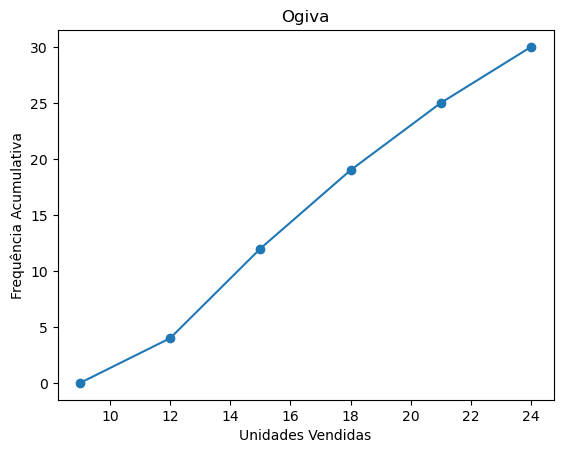

In [7]:
ini_ogiva = [classes[1] - amplitude]

x_data = ini_ogiva + [limite for limite in classes[1:]]
y_data = np.concatenate([[0], tabela_frequencia['Frenquência Acumulativa']])

plt.plot(x_data, y_data, marker='o')

plt.title('Ogiva')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Frequência Acumulativa')
plt.show()

In [8]:
categorias = ['TVs', 'Laptops', 'Celulares', 'Tablets']
numVendas = [60, 80, 200, 50]
precoMedio = [2000, 3500, 1200, 1800]
dtPorCategoria = pd.DataFrame({
  'Categorias': categorias,
  'Número de Vendas': numVendas,
  'Preço Médio': precoMedio
})
display(dtPorCategoria)

,Categorias,Número de Vendas,Preço Médio
0,TVs,60,2000
1,Laptops,80,3500
2,Celulares,200,1200
3,Tablets,50,1800


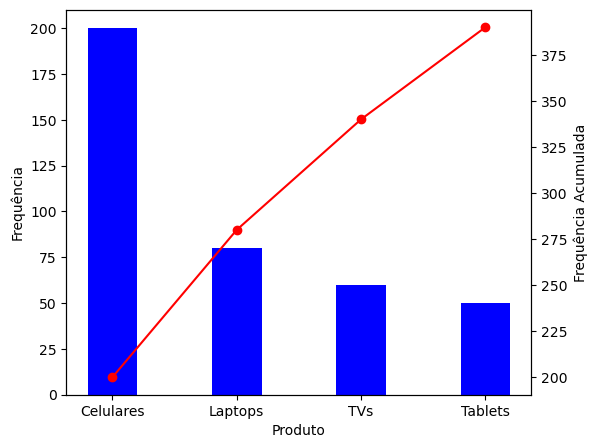

In [9]:
# Ordena o dataframe pela coluna 'Número de Vendas'
frequencia = dtPorCategoria.sort_values(by='Número de Vendas', ascending=False)

# Calcula a frequência acumulada corretamente
frequencia['Frequência Acumulada'] = frequencia['Número de Vendas'].cumsum()

# Cria a figura e os dois eixos y
fig, ax1 = plt.subplots(figsize=(6, 5))
ax2 = ax1.twinx()

# Gráfico de barras com as categorias e o número de vendas
ax1.bar(frequencia['Categorias'], frequencia['Número de Vendas'], color='blue', width=0.4)

# Gráfico de linha para a frequência acumulada
ax2.plot(frequencia['Categorias'], frequencia['Frequência Acumulada'], color='red', marker='o')

# Rótulos dos eixos
ax1.set_xlabel('Produto')
ax1.set_ylabel('Frequência')
ax2.set_ylabel('Frequência Acumulada')

# Exibe o gráfico
plt.show()


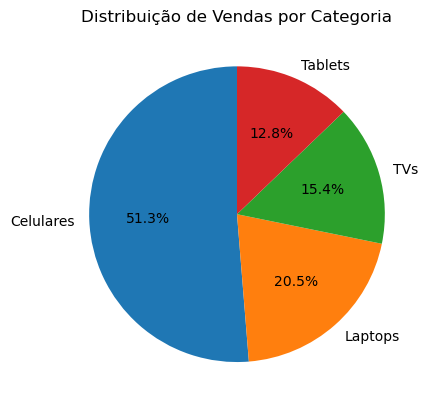

In [10]:

frequencia["Frequência Relativa"] = frequencia["Número de Vendas"]/frequencia["Número de Vendas"].sum()
plt.pie(frequencia['Frequência Relativa'], labels=frequencia['Categorias'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Vendas por Categoria')
plt.show()

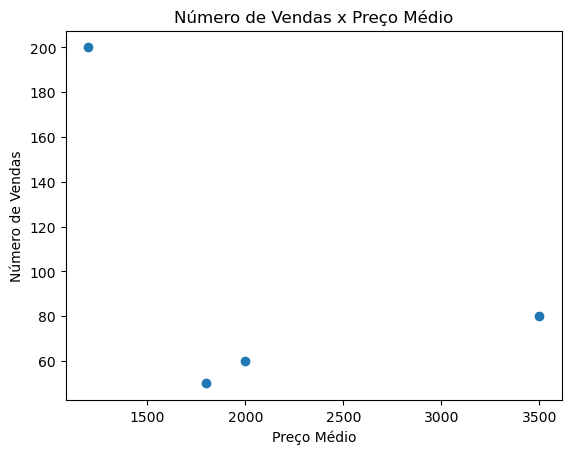

In [11]:
plt.scatter(frequencia['Preço Médio'], frequencia['Número de Vendas'])
plt.title('Número de Vendas x Preço Médio')
plt.xlabel('Preço Médio')
plt.ylabel('Número de Vendas')
plt.show()


In [12]:
vendasDiarias = {'Vendas por Dia': [12, 15, 14, 10, 12, 16, 18, 17, 14, 19, 20, 22, 21, 15, 14, 13, 16, 15, 12, 10, 9, 11, 13, 17, 18, 19, 20, 21, 22, 23]}

dt = pd.DataFrame(vendasDiarias)
display(dt)

,Vendas por Dia
0,12
1,15
2,14
3,10
4,12
5,16
6,18
7,17
8,14
9,19


,Vendas por Dia,Dias
0,12,1
1,15,2
2,14,3
3,10,4
4,12,5
5,16,6
6,18,7
7,17,8
8,14,9
9,19,10


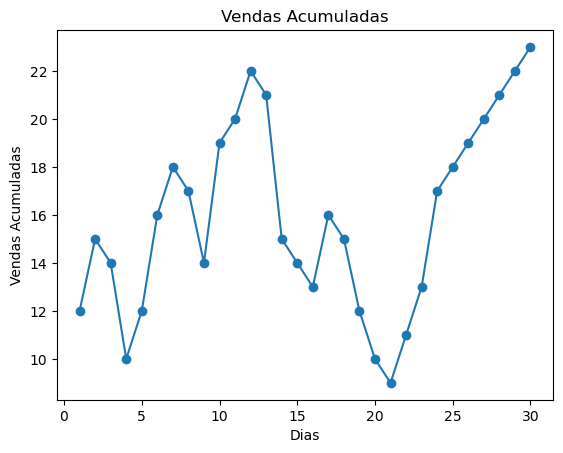

In [13]:
dt["Dias"] = np.arange(1, len(dt)+1)
display(dt)
plt.plot(dt['Dias'], dt["Vendas por Dia"], marker='o')
plt.title('Vendas Acumuladas')
plt.xlabel('Dias')
plt.ylabel('Vendas Acumuladas')
plt.show()



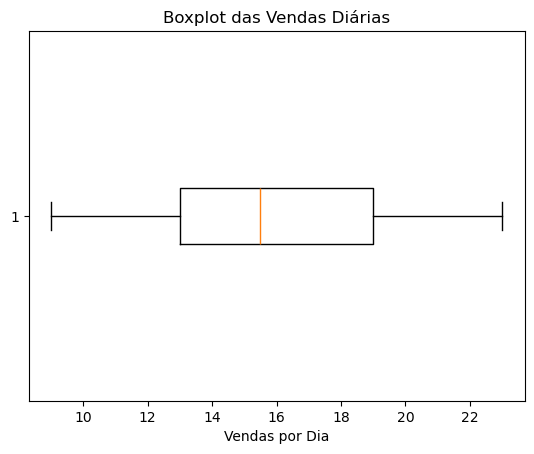

In [14]:
import seaborn as sns

plt.boxplot(dt["Vendas por Dia"], data=dt, vert=False)   
plt.title('Boxplot das Vendas Diárias')
plt.xlabel('Vendas por Dia')
plt.show()

In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Importação do conjunto de dados
gorjetas = pd.read_csv("gorjetas.csv")
print('5 primeiras linhas do conjunto de dados:')
display(gorjetas.head())

# Determinação dos quartis
quartis = gorjetas.quantile([0.25, 0.5, 0.75], axis=0, interpolation='linear', numeric_only=True)
print('Tabela com os quartis para cada coluna numérica:')
display(quartis)

# Percentis customizados
percentis = gorjetas.quantile([0.1, 0.3, 0.8], axis=0, interpolation='linear', numeric_only=True)
print('Tabela com percentis customizados:')
display(percentis)

# Análise exploratória inicial
print('Análise exploraória:')
gorjetas.describe()

5 primeiras linhas do conjunto de dados:


,valor_total,gorjeta,sexo,fumante,dia,hora,tamanho
0,16.99,1.01,Mulher,Nao,Domingo,Jantar,2
1,10.34,1.66,Homem,Nao,Domingo,Jantar,3
2,21.01,3.50,Homem,Nao,Domingo,Jantar,3
3,23.68,3.31,Homem,Nao,Domingo,Jantar,2
4,24.59,3.61,Mulher,Nao,Domingo,Jantar,4


Tabela com os quartis para cada coluna numérica:


,valor_total,gorjeta,tamanho
0.25,13.3475,2.0000,2.0
0.50,17.7950,2.9000,2.0
0.75,24.1275,3.5625,3.0


Tabela com percentis customizados:


,valor_total,gorjeta,tamanho
0.1,10.340,1.5,2.0
0.3,14.249,2.0,2.0
0.8,26.098,4.0,3.0


Análise exploraória:


,valor_total,gorjeta,tamanho
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


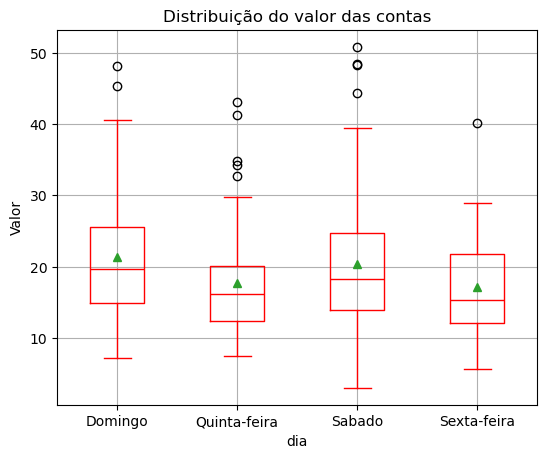

In [16]:
gorjetas.boxplot(by='dia', column=['valor_total'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das contas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()



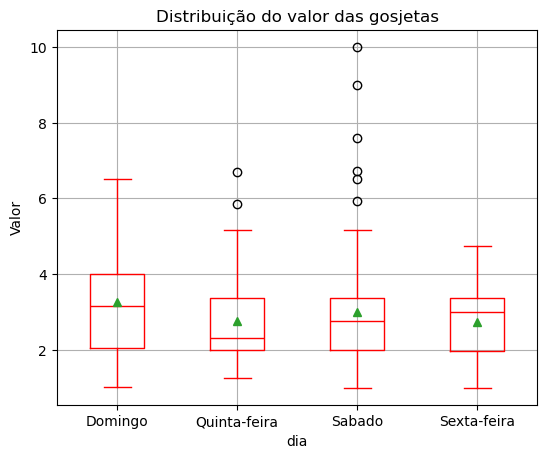

In [17]:
gorjetas.boxplot(by='dia', column=['gorjeta'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

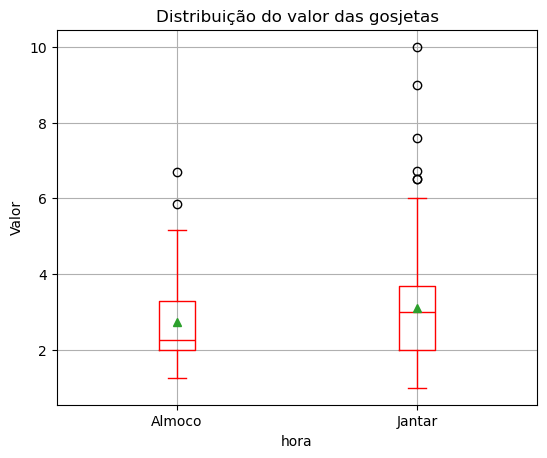

In [18]:
gorjetas.boxplot(by='hora', column=['gorjeta'], color='red', showmeans=True, figsize=(6, 5))

# Título
plt.title('Distribuição do valor das gosjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Mostra o gráfico
plt.show()

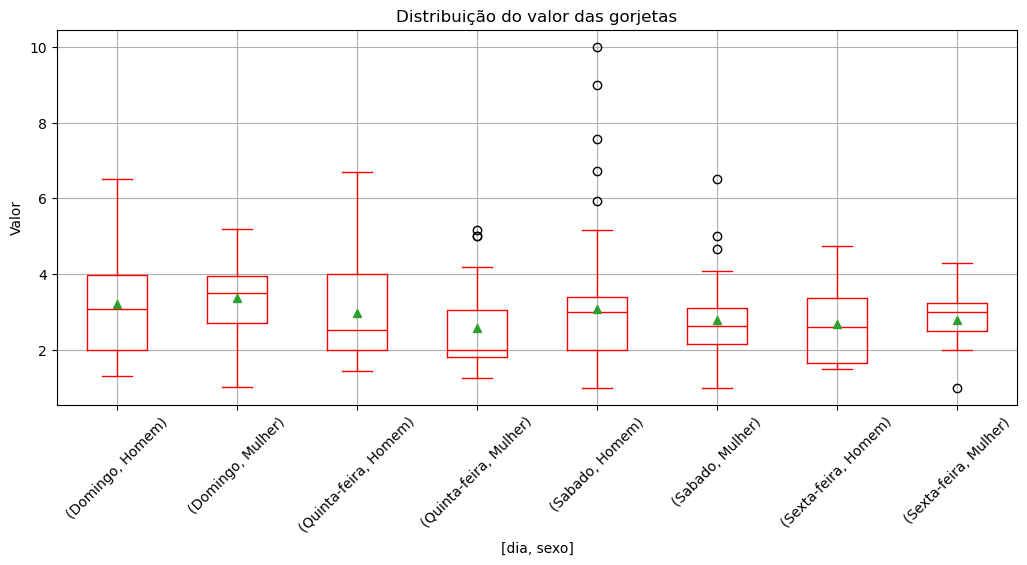

In [20]:
gorjetas.boxplot(by=['dia', 'sexo'], column=['gorjeta'], color='red', showmeans=True, figsize=(12, 5))

# Título
plt.title('Distribuição do valor das gorjetas')
plt.ylabel('Valor')
plt.suptitle('')

# Rotacionar os textos do eixo x em 45 graus
plt.xticks(rotation=45)

# Mostra o gráfico
plt.show()